In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("data/heterogeneity.csv")
df.head()

,strategies,memory,threshold,sigma,std
0,2,2,6000.0,0.0,0.505242
1,2,2,6000.0,0.0,0.377124
2,2,2,6000.0,0.0,0.094281
3,2,2,6000.0,0.0,0.505242
4,2,2,6000.0,0.0,0.094281


In [4]:
df.groupby(["memory", "strategies"])["std"].mean()

memory  strategies
2       2               0.173655
        4             178.925475
        10            771.556069
10      2               0.231487
        5               0.909629
        10              3.627173
        20             56.425787
        50            126.594054
Name: std, dtype: float64

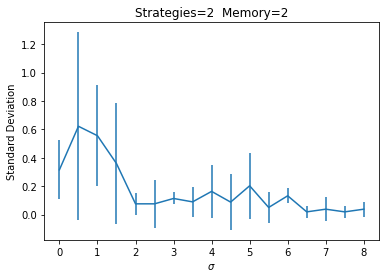

In [7]:
import numpy as np

def plot_vs_sigma(strategies, memory):
    filtered = df[(df.strategies==strategies) & (df.memory==memory)][["sigma", "std"]]

    vals = filtered.groupby("sigma").mean()
    errs = filtered.groupby("sigma").std()

    yerr = np.ravel(errs.values)

    plt.errorbar(vals.index, vals.values, yerr=yerr)
    plt.xlabel("$\sigma$")
    plt.ylabel("Standard Deviation")
    plt.title(f"Strategies={strategies}  Memory={memory}")
    
plot_vs_sigma(2,2)

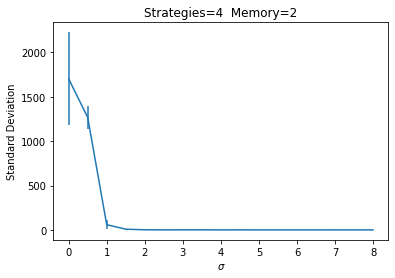

In [67]:
plot_vs_sigma(4,2)

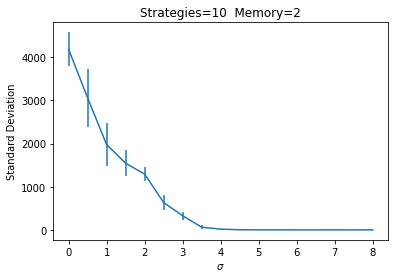

In [68]:
plot_vs_sigma(10,2)

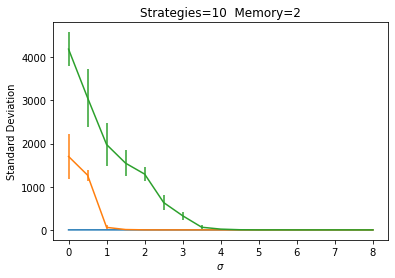

In [8]:
plot_vs_sigma(2,2)
plot_vs_sigma(4,2)
plot_vs_sigma(10,2)

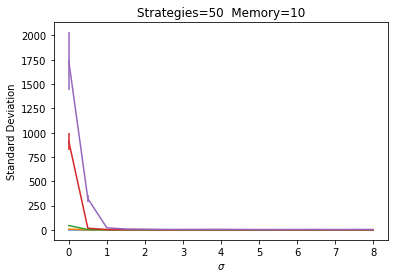

In [9]:
plot_vs_sigma(2,10)
plot_vs_sigma(5,10)
plot_vs_sigma(10,10)
plot_vs_sigma(20,10)
plot_vs_sigma(50,10)

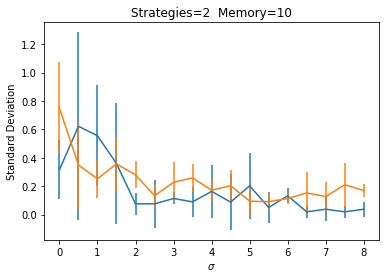

In [10]:
plot_vs_sigma(2,2)
plot_vs_sigma(2,10)

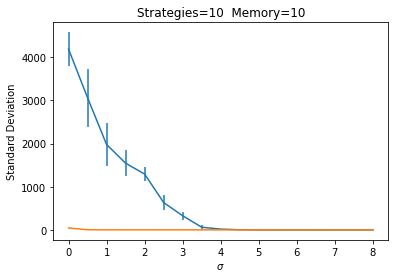

In [11]:
plot_vs_sigma(10,2)
plot_vs_sigma(10,10)

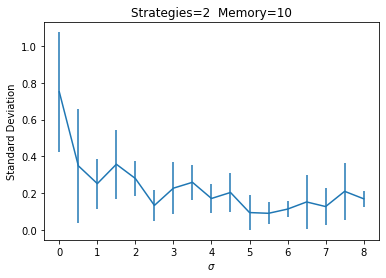

In [69]:
plot_vs_sigma(2,10)

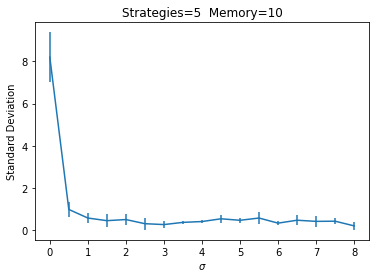

In [71]:
plot_vs_sigma(5, 10)

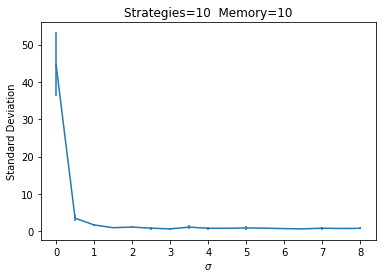

In [72]:
plot_vs_sigma(10, 10)

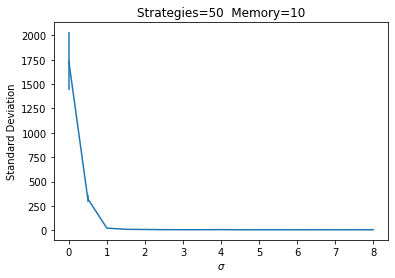

In [73]:
plot_vs_sigma(50, 10)